# Tag Clouds in Python ☁️ 🐍

May 2020 - [@Quant_Girl](https://twitter.com/Quant_Girl)

---

A word cloud or [tag cloud](https://en.wikipedia.org/wiki/Tag_cloud) is a [data visualisation](https://en.wikipedia.org/wiki/Data_visualization) tool in which words are shown in varying sizes depending on how often they appear in your data. 

In this notebook we will cover the following two steps towards our pretty word-clouds:

1. Get some text from different sources to make our clouds 
2. Make some clouds using the [**WordCloud**](https://pypi.org/project/wordcloud/) package. 

---



# 1. Get Some Text

The first step to make word-clouds is getting some text. There are many ways to do this (we can simply type it 😅) but we will explore the following three methods:

1.  Producing dummy text using the [**lorem**](https://pypi.org/project/lorem/) library

2.  Extracting text from the web using [**Requests**](https://requests.readthedocs.io/en/master/) and [**Beautiful Soup** ](https://www.crummy.com/software/BeautifulSoup/)

3.  Extracting text from a PDF document using [**pdfminer**](https://pypi.org/project/pdfminer/)

## Dummy Text

The package **lorem** generates random text that looks like Latin. Very helpul for testing purposes or placeholders.

In [1]:
import lorem
text = lorem.text()
text

'Neque labore voluptatem voluptatem sed non labore tempora. Magnam aliquam tempora modi labore velit ut amet. Ipsum aliquam velit amet modi dolore. Dolorem magnam quisquam velit. Magnam non non voluptatem. Ipsum porro ut consectetur quiquia voluptatem. Etincidunt adipisci consectetur neque tempora. Adipisci porro est quiquia dolore. Quiquia neque voluptatem adipisci adipisci numquam consectetur aliquam.\n\nNon ipsum ut voluptatem dolorem neque non neque. Tempora adipisci sed adipisci tempora quisquam est. Labore labore ut velit magnam adipisci neque. Adipisci quisquam labore ut. Sit ipsum porro ut velit. Neque consectetur neque numquam dolorem etincidunt non. Ut dolore ipsum modi porro quaerat sit. Velit labore consectetur labore numquam tempora magnam velit. Ut quiquia non ipsum.\n\nDolorem tempora quisquam tempora sed adipisci. Tempora magnam modi dolor. Velit neque labore modi. Adipisci etincidunt quisquam numquam. Neque voluptatem quiquia dolore numquam non consectetur labore. Magn

## Getting text from the Web

Beautiful Soup is a well known Python package for parsing HTML and XML documents. We can easily extract text from any website as follows:

In [2]:
import requests
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, "html.parser")
text = soup.body.get_text()
text[:2000]

'\n\n\n\n\n\n\n\nBlack–Scholes model\n\nFrom Wikipedia, the free encyclopedia\n\n\nJump to navigation\nJump to search\nMathematical model\nThe Black–Scholes /ˌblæk ˈʃoʊlz/[1] or Black–Scholes–Merton model is a mathematical model for the dynamics of a financial market containing derivative investment instruments. From the partial differential equation in the model, known as the Black–Scholes equation, one can deduce the Black–Scholes formula, which gives a theoretical estimate of the price of European-style options and shows that the option has a unique price regardless of the risk of the security and its expected return (instead replacing the security\'s expected return with the risk-neutral rate). The formula led to a boom in options trading and provided mathematical legitimacy to the activities of the Chicago Board Options Exchange and other options markets around the world.[2] It is widely used, although often with some adjustments, by options market participants.[3]:751\nBased on w

## Extracting text from a PDF File

Finally, we will used PDminer package to write a small function to extract the text from a pdf file.

In [3]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def get_text_pdf(path):

    resource_manager = PDFResourceManager()
    string_io = StringIO()
    la_params = LAParams()
    device = TextConverter(resource_manager, string_io, laparams=la_params)

    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(resource_manager, device)
    password = ""
    max_pages = 0
    caching = True
    pagenos = set()

    pages = PDFPage.get_pages(fp, pagenos,
                              maxpages=max_pages, password=password, caching=caching,
                              check_extractable=True)

    for page in pages:
        interpreter.process_page(page)

    text = string_io.getvalue()
    fp.close()
    device.close()
    string_io.close()

    return text

In [4]:
text = get_text_pdf('Data/Jarrow_Protter.pdf')
text[:2000]

'A Festschrift for Herman Rubin\nInstitute of Mathematical Statistics\nLecture Notes – Monograph Series\nVol. 45 (2004) 75–91\nc(cid:1) Institute of Mathematical Statistics, 2004\n\nA short history of stochastic integration\n\nand mathematical ﬁnance: The early\n\nyears, 1880–1970\n\nRobert Jarrow1 and Philip Protter∗1\n\nCornell University\n\nAbstract: We present a history of the development of the theory of Stochastic\nIntegration, starting from its roots with Brownian motion, up to the introduc-\ntion of semimartingales and the independence of the theory from an underlying\nMarkov process framework. We show how the development has inﬂuenced and\nin turn been inﬂuenced by the development of Mathematical Finance Theory.\nThe calendar period is from 1880 to 1970.\n\nThe history of stochastic integration and the modelling of risky asset prices both\nbegin with Brownian motion, so let us begin there too. The earliest attempts to\nmodel Brownian motion mathematically can be traced to thre

---
Now that we have options to get some text, let's make clouds ☁️☁️☁️☁️

---

# 2. Make Some Clouds!

We will make three clouds to illustrate the features of the [**WordCloud**](https://pypi.org/project/wordcloud/) package. 

## Basic WordCloud

Let us start by making a simple word cloud by passing our favorite text to the *generate* function.

In [5]:
from wordcloud import WordCloud
word_cloud = WordCloud().generate(text)

Now that our wordcloud object has been created we can then visualise using [Matplotlib](https://matplotlib.org/index.html).

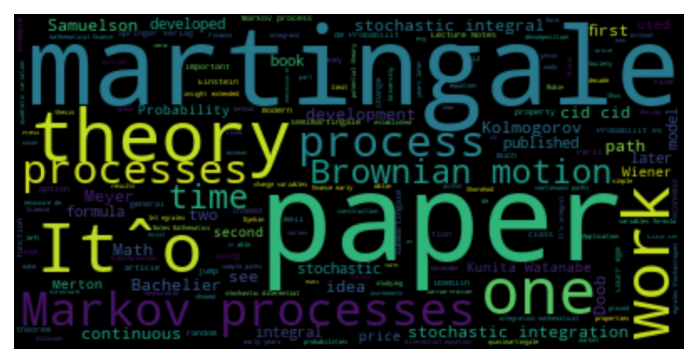

In [6]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'

plt.figure()
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

## Customised Word Cloud

Now, let us customise our cloud using the parameters of WordCloud.

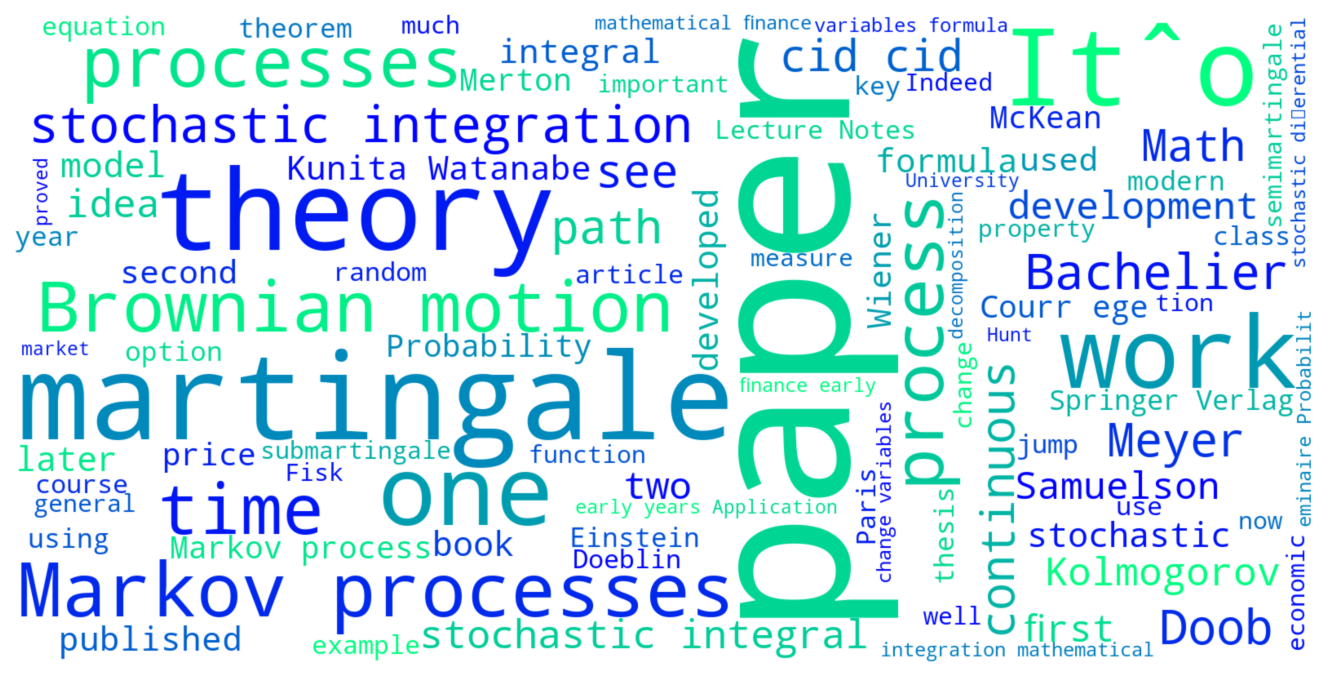

In [7]:
word_cloud = WordCloud(width=1600,
                       height=800,
                       colormap='winter', # We can use any colormap!
                       margin=2,
                       max_words=100, # Maximum numbers of words we want to see 
                       min_word_length=3, # Minimum numbers of letters of each word to be part of the cloud
                       max_font_size=250, min_font_size=20,  # Font size range
                       background_color="white").generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

## Cloud with Custom Mask

Finally, let us get fancy and

- Customise the font (because who does not like fancy fonts?) 
- Use an image mask to determine the **shape** of the cloud
- Use an image mask to determine the **colours** pattern

For this, we will need the help of two more Python packages, namely

- [numpy](https://numpy.org/)
- [pillow](https://pillow.readthedocs.io/en/stable/)

In [8]:
import numpy as np
from PIL import Image

### Customised Font

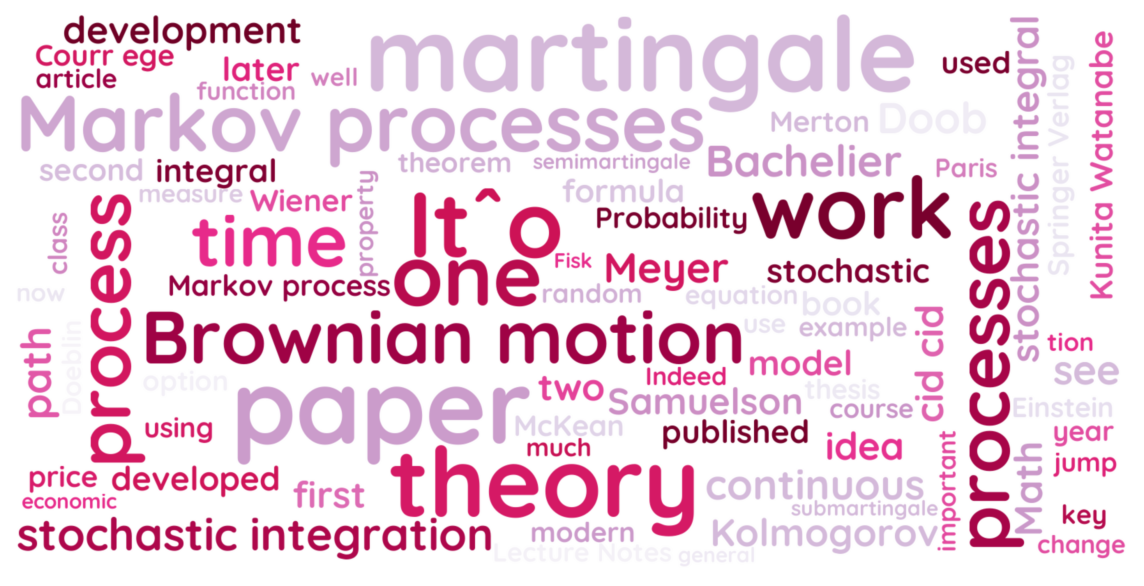

In [9]:
font = 'Fonts/Quicksand-Bold.ttf'
word_cloud = WordCloud(font_path=font,
                       width=1600,
                       height=800,
                       colormap='PuRd',
                       margin=0,
                       max_words=500,
                       min_word_length=3,
                       max_font_size=150, min_font_size=30, 
                       background_color="white").generate(text)

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

### Customised Font and Mask Shape

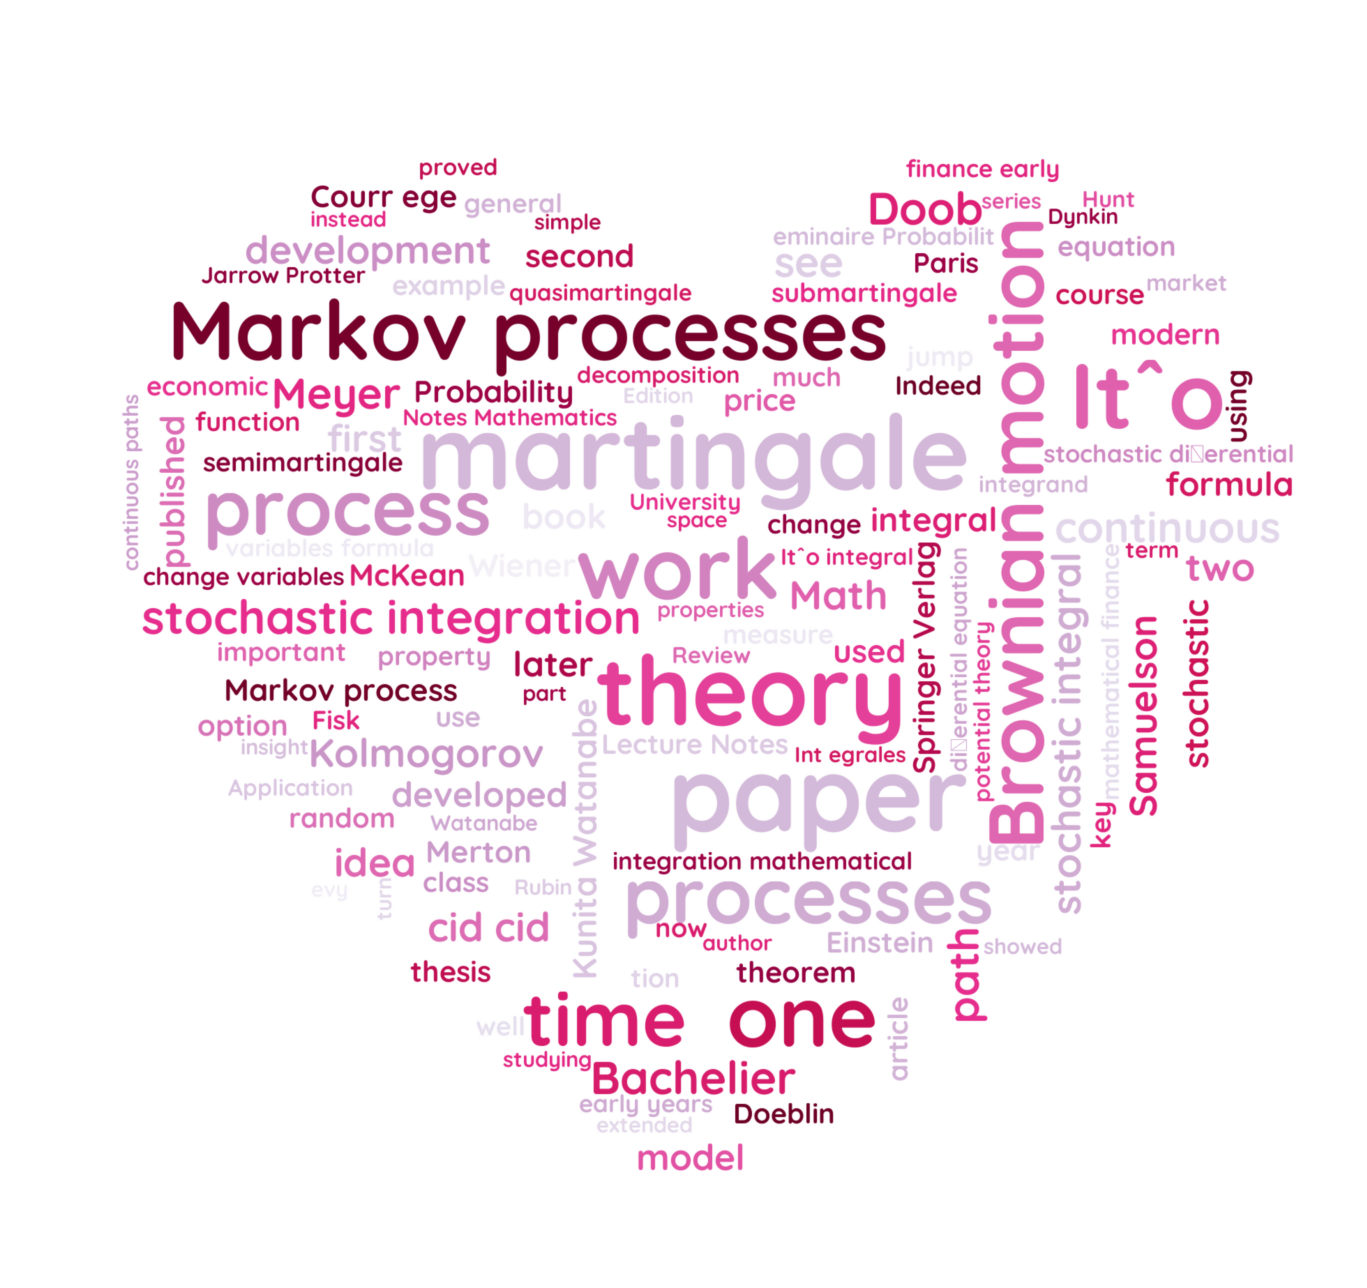

In [10]:
font = 'Fonts/Quicksand-Bold.ttf'
custom_mask = np.array(Image.open("Figures/heart.png"))
word_cloud = WordCloud(font_path=font, mask=custom_mask,
                       width=1600,
                       height=800,
                       colormap='PuRd',
                       margin=0,
                       max_words=500,
                       min_word_length=3,
                       max_font_size=150, min_font_size=30, 
                       background_color="white").generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

In [11]:
### Customised Font and Mask Shape and Colour Pattern

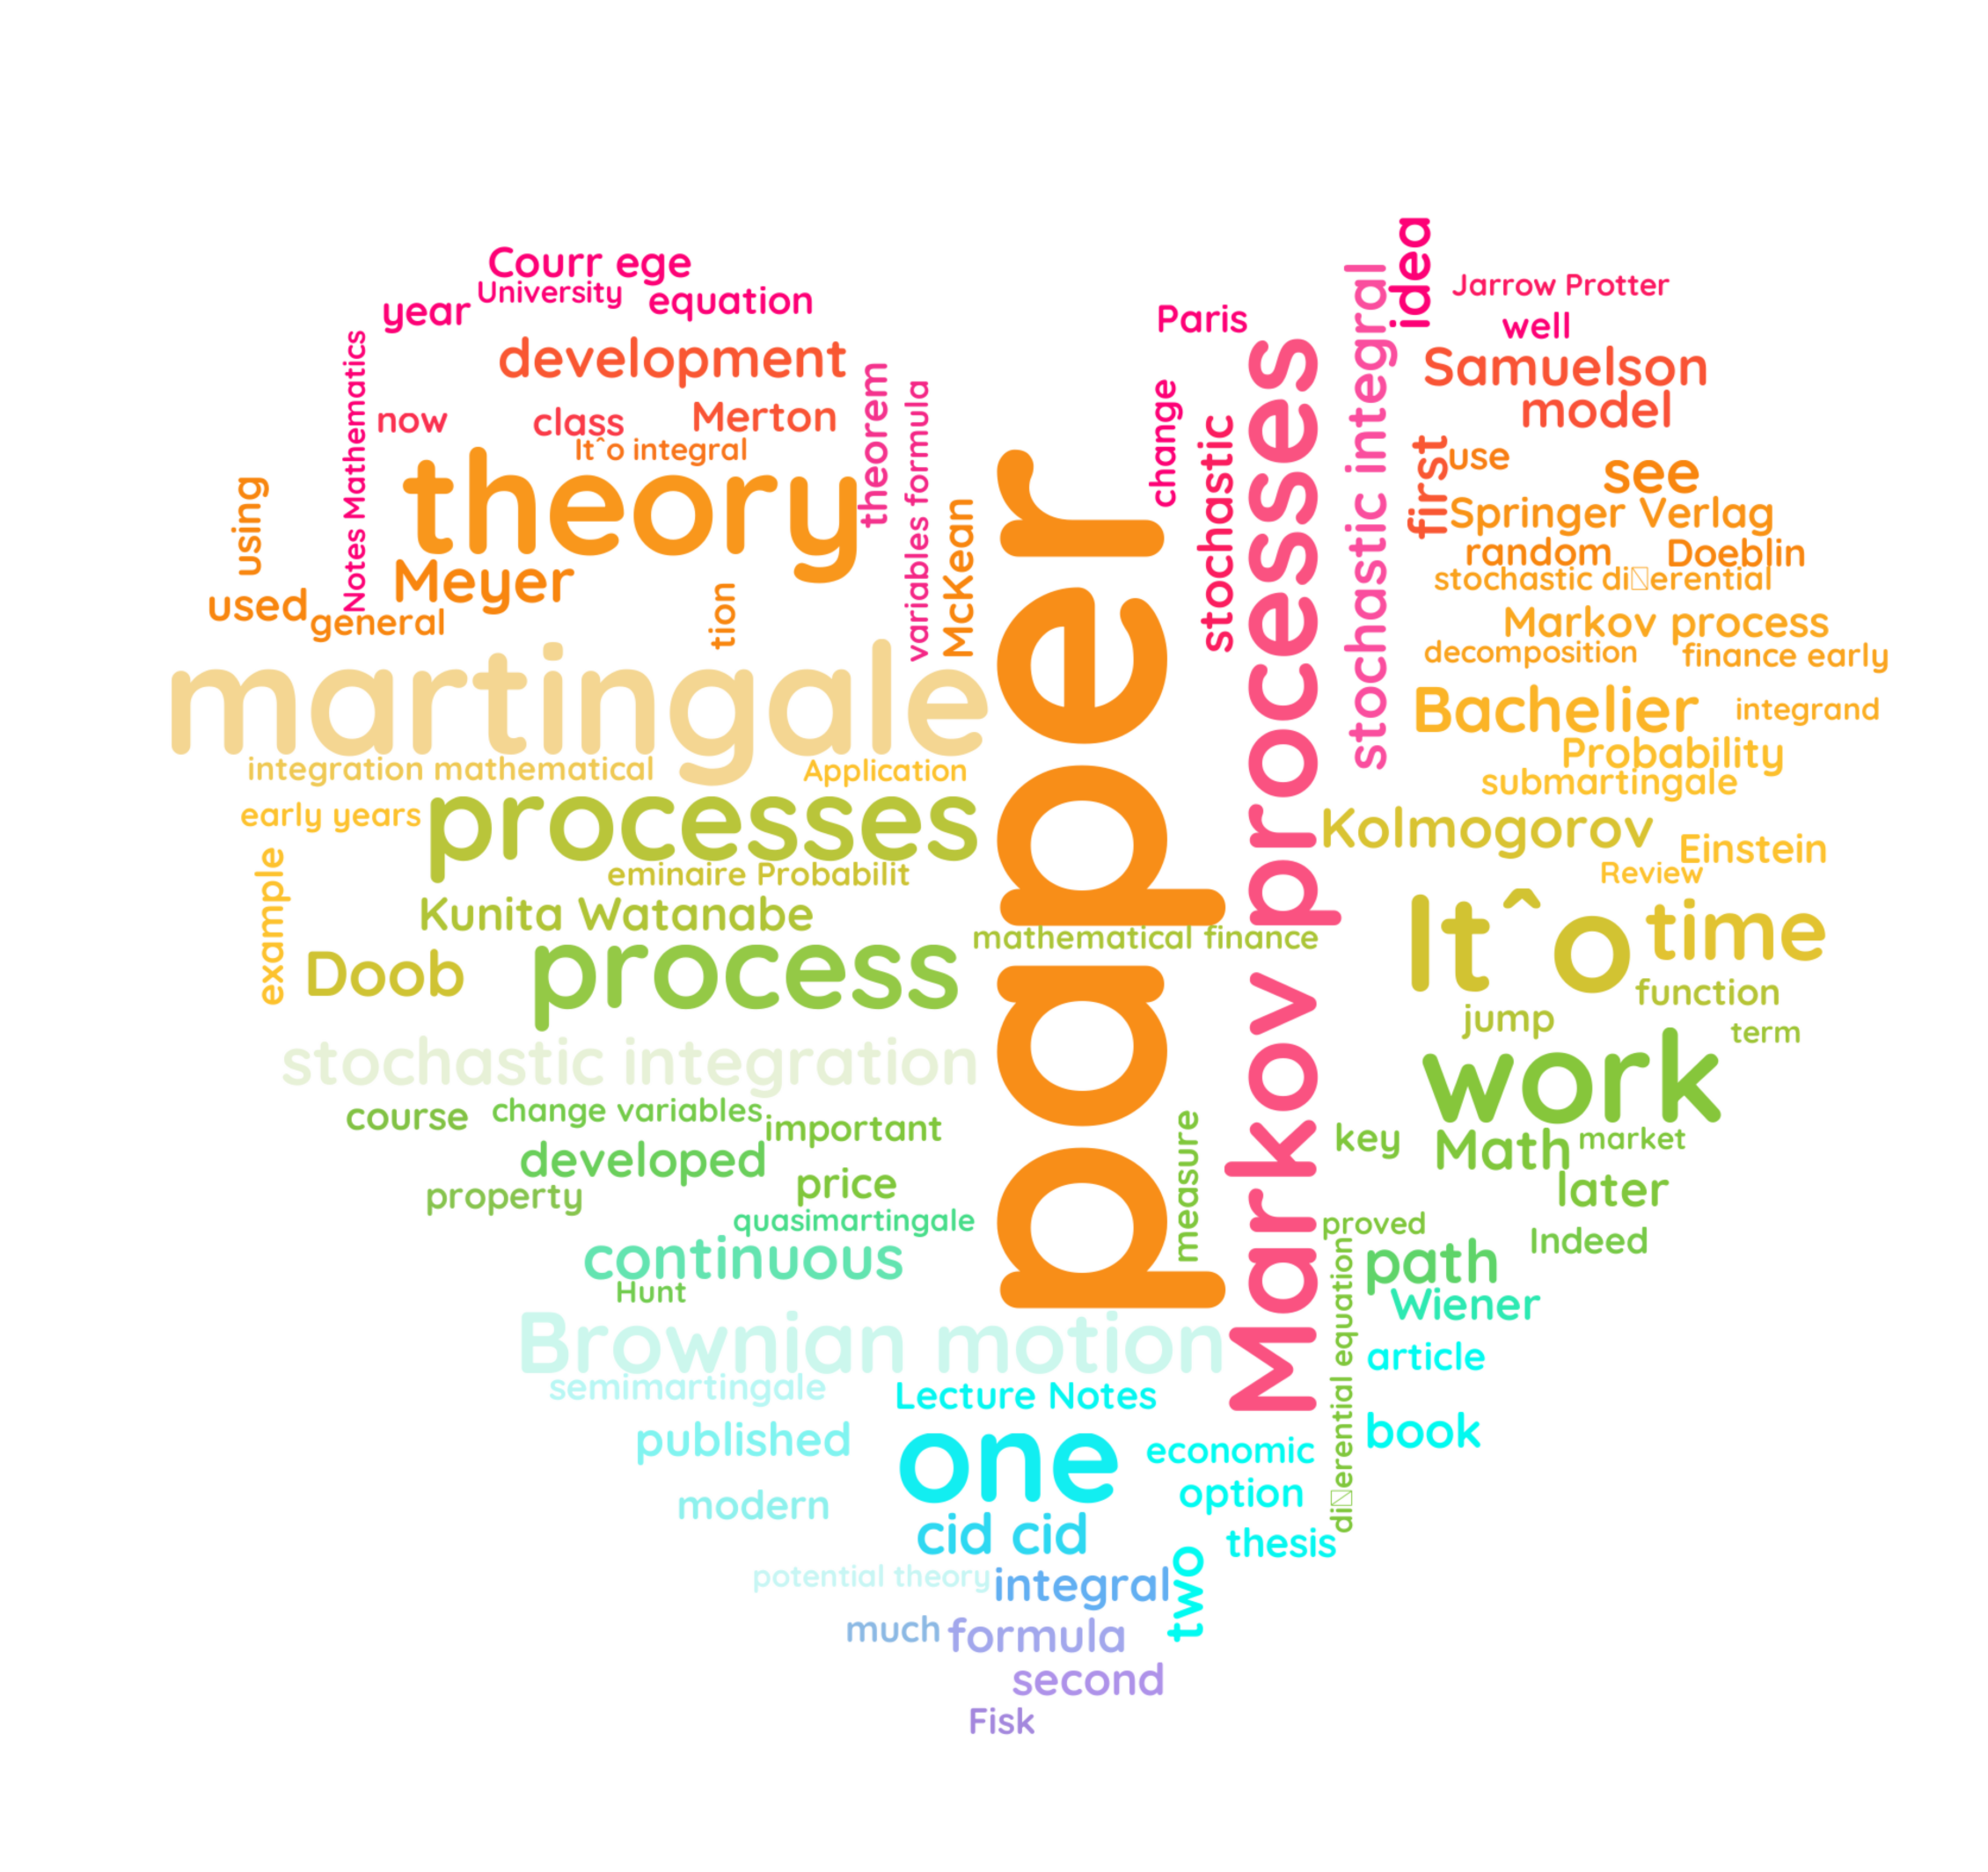

In [12]:
from wordcloud import ImageColorGenerator
font = 'Fonts/Quicksand-Bold.ttf'
custom_mask = np.array(Image.open("Figures/heart.png"))
word_cloud = WordCloud(font_path=font, mask=custom_mask,
                       width=1600,
                       height=800,
                       colormap='PuRd',
                       margin=0,
                       max_words=500,
                       min_word_length=3,
                       max_font_size=300, min_font_size=30, 
                       background_color="white").generate(text)

image_colors = ImageColorGenerator(custom_mask)
word_cloud.recolor(color_func=image_colors)

plt.figure(figsize=(20, 20))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

We can save our clouds by simply using plt.savefig('name.png') before (or insted) of plt.show()

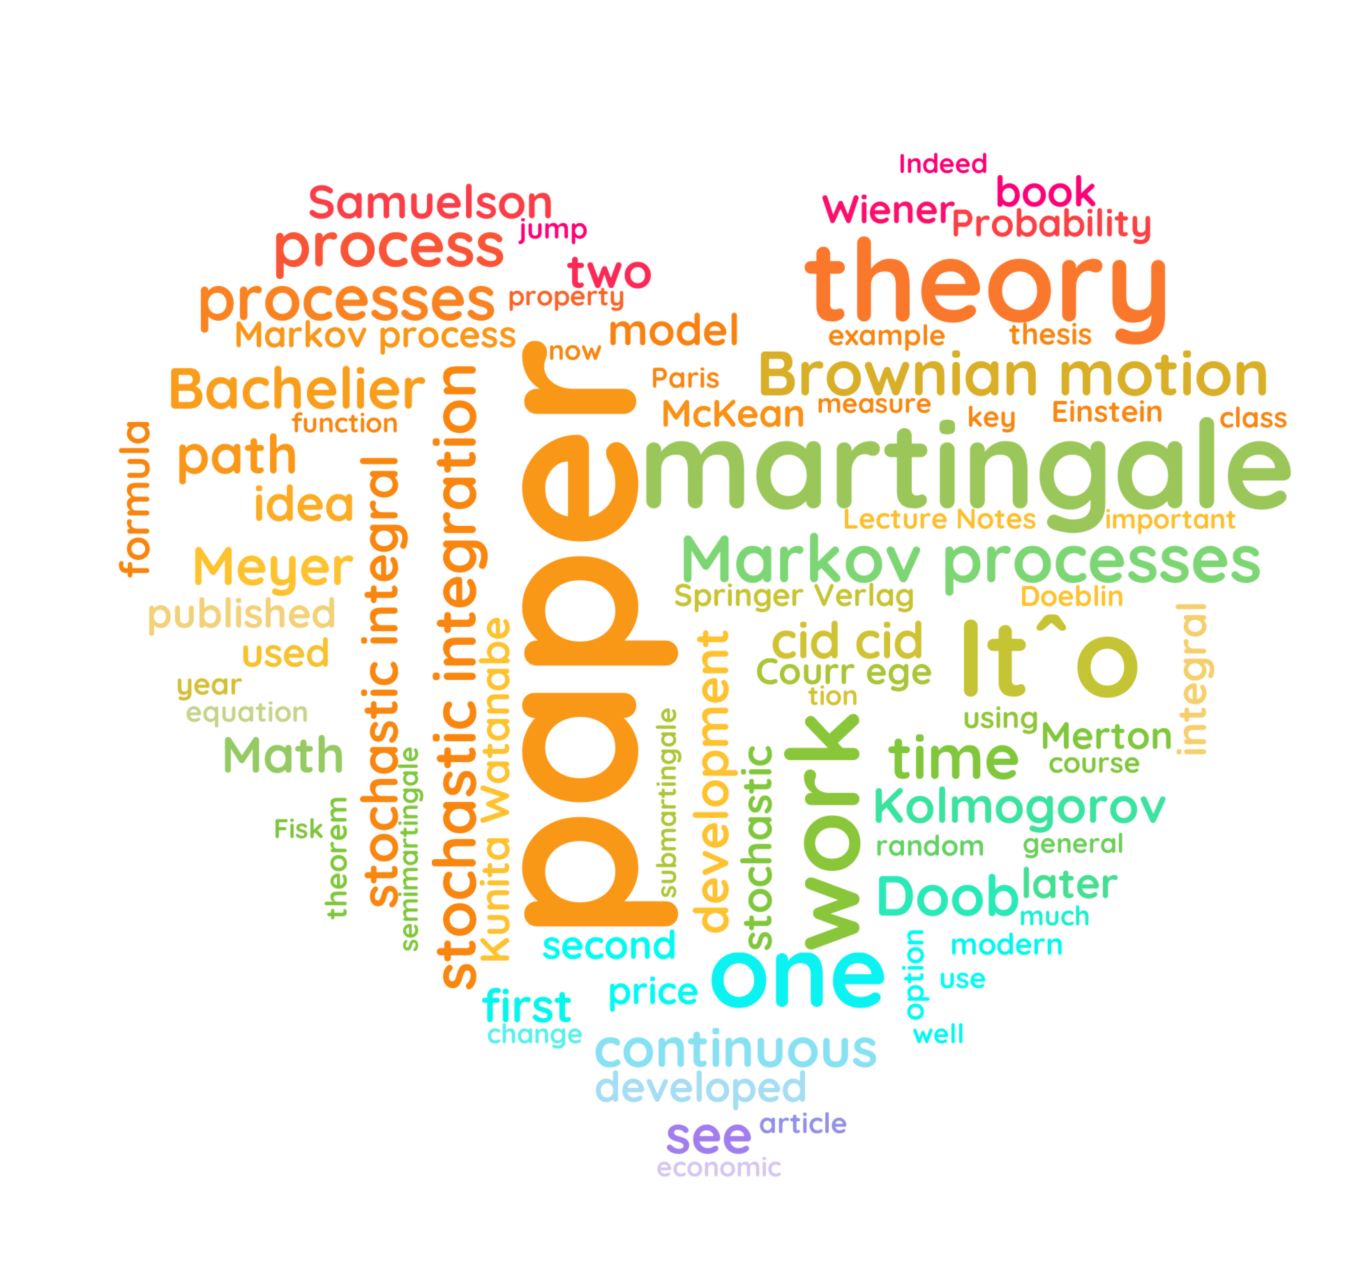

In [13]:
word_cloud = WordCloud(font_path=font, mask=custom_mask,
                       width=1600,
                       height=800,
                       colormap='PuRd',
                       margin=0,
                       max_words=200,
                       min_word_length=3,
                       max_font_size=300, min_font_size=30, 
                       background_color="white").generate(text)

image_colors = ImageColorGenerator(custom_mask)
word_cloud.recolor(color_func=image_colors)

plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.savefig('my_cloud.png')

## Bonus

We can get rid of particular words in our cloud. For example. I don't want my cloud to contain the words paper, work, and see.

Wordcloud package allows us to do this by simply using the stopwords argument. 

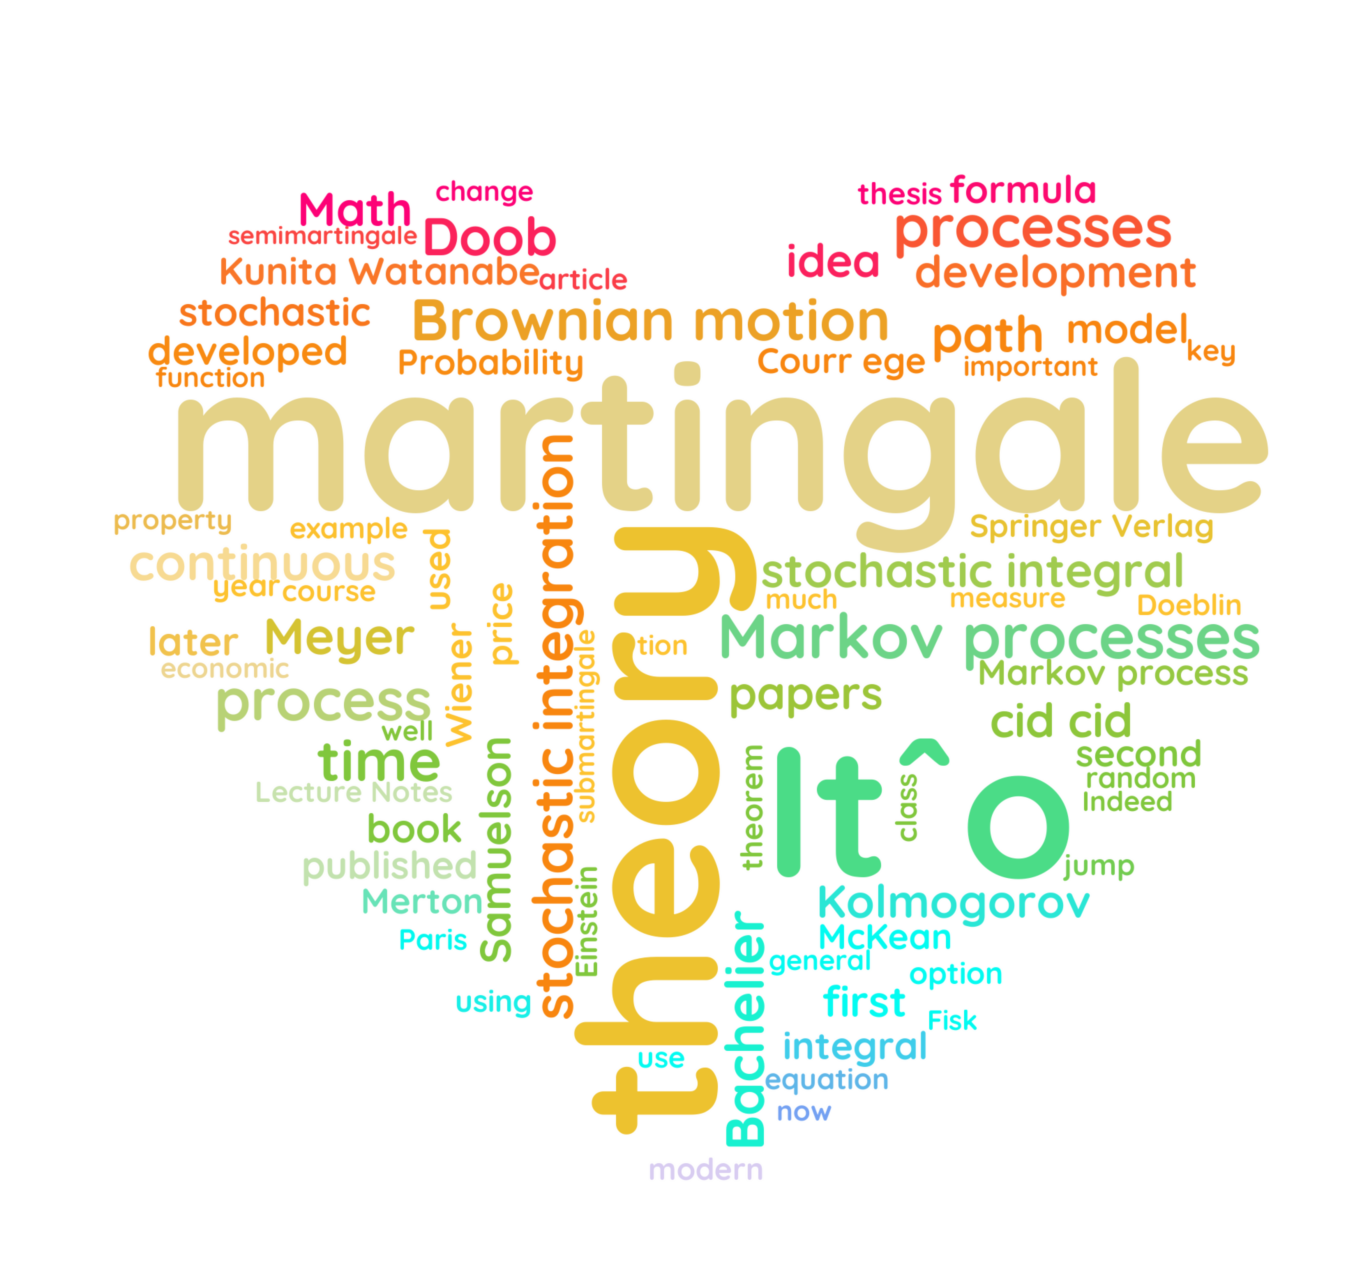

In [14]:
from wordcloud import STOPWORDS

mystopwords = STOPWORDS
mystopwords.update(['paper', 'one', 'two', 'work', 'see'])


word_cloud = WordCloud(font_path=font, mask=custom_mask,
                       width=1600,
                       height=800,
                       colormap='PuRd',
                       margin=0,
                       max_words=150,
                       min_word_length=3,
                       max_font_size=300, min_font_size=30, 
                       stopwords=mystopwords,
                       background_color="white").generate(text)

image_colors = ImageColorGenerator(custom_mask)
word_cloud.recolor(color_func=image_colors)

plt.figure(figsize=(12, 12))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()


For more customisation and options check out the docstring of the function, and see all required and optional arguments. 
To do so, type ?function and run it to get all information.

In [15]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=200)
    Height of the canvas.
